<a href="https://colab.research.google.com/github/akwesi-duodu/mod-sim/blob/main/_assignment1pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question1

In [ ]:
try:
    import pint
except ImportError:
    !pip install pint
from pint import UnitRegistry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 6.7 MB/s eta 0:00:00


In [ ]:
from pint import UnitRegistry #importing units library
ureg = UnitRegistry()
centimeter=ureg.centimeter
grams=ureg.grams
seconds=ureg.seconds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def salt_in_tank(r, c, V, Q0, t):
    """
    Calculate the amount of salt in the tank at time t.

    Parameters:
    r (float): Rate of seawater flow in/out (cm³/s).
    c (float): Salt concentration in incoming seawater (grams/cm³).
    V (float): Volume of water in the tank (cm³).
    Q0 (float): Initial amount of salt in the tank (grams).
    t (float// array): Time (seconds).

    Returns:
    float or array: Amount of salt in the tank at time t.
    """

    Q_t = V * c * (1 - np.exp(-r * t / V)) + Q0 * np.exp(-r * t / V)  #given the first order differentiation approach, amount(n) equals the concentration of
                                                                      #salt by constant water volume(v) plus the initial amount of salt already in tank.(Q0)
    return Q_t
salt_in_tank(3,4,3,1,2)


10.51131188439726

Question 1b. Simulation

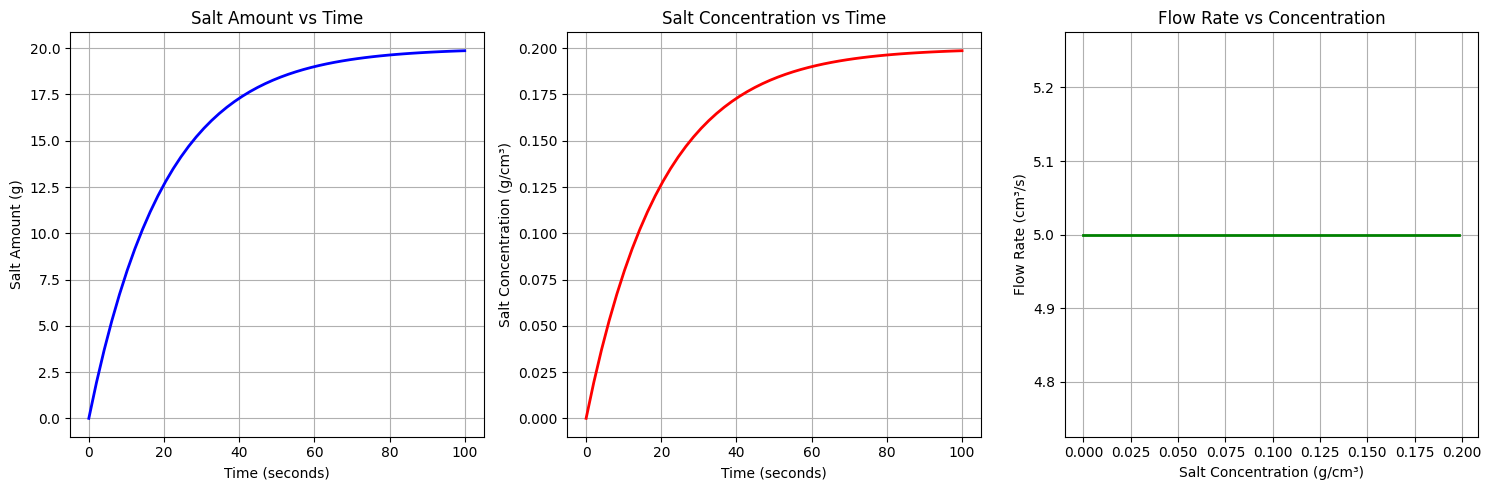


Simulation Parameters:
Tank Volume: 100 cm³
Input Salt Concentration: 0.2 g/cm³
Flow Rate: 5 cm³/s

Results:
Steady-state salt amount: 20.00 g
Time to reach 95% of steady-state: 59.91 seconds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_salt_amount(t, r, c, V, y0=0):
    """Calculate amount of salt in tank at time t"""
    return c*V*(1 - np.exp(-r*t/V)) + y0*np.exp(-r*t/V)

# Simulation parameters
V = 100  # Tank volume (cm³)
c = 0.2  # Salt concentration in incoming water (g/cm³)
r = 5    # Flow rate (cm³/s)
t = np.linspace(0, 100, 50)  # Time points from 0 to 100 seconds

# Calculate salt amounts
salt_amounts = calculate_salt_amount(t, r, c, V)
concentrations = salt_amounts/V

# Create figure with multiple subplots
plt.figure(figsize=(15, 5))

# Plot 1: Salt amount over time
plt.subplot(131)
plt.plot(t, salt_amounts, 'b-', linewidth=2)
plt.xlabel('Time (seconds)')
plt.ylabel('Salt Amount (g)')
plt.title('Salt Amount vs Time')
plt.grid(True)

# Plot 2: Salt concentration over time
plt.subplot(132)
plt.plot(t, concentrations, 'r-', linewidth=2)
plt.xlabel('Time (seconds)')
plt.ylabel('Salt Concentration (g/cm³)')
plt.title('Salt Concentration vs Time')
plt.grid(True)

# Plot 3: Phase plot (Concentration vs Flow Rate)
plt.subplot(133)
flow_rates = np.ones_like(t) * r  # Constant flow rate
plt.plot(concentrations, flow_rates, 'g-', linewidth=2)
plt.xlabel('Salt Concentration (g/cm³)')
plt.ylabel('Flow Rate (cm³/s)')
plt.title('Flow Rate vs Concentration')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print values
print(f"\nSimulation Parameters:")
print(f"Tank Volume: {V} cm³")
print(f"Input Salt Concentration: {c} g/cm³")
print(f"Flow Rate: {r} cm³/s")
print(f"\nResults:")
print(f"Steady-state salt amount: {c*V:.2f} g")
print(f"Time to reach 95% of steady-state: {-V/r * np.log(0.05):.2f} seconds")

Question 2A.

Key Parameters:


*   Warehouse capacity
*   Unloading rate//service time=randomly generated


*   Arrival time=current time + estimated arrival time
*  departure time=current time + estimated service time


*  Waiting time=departure- arrival times
*   Number of trucks in system

Key Relationships:

Arrivals and Capacity:

Trucks should be turned away if warehouse is at full capacity. Otherwise they should be queued on FIFO basis.

Service Time vs. Arrival Rate:

Faster unloading means less congestion
Higher arrival rates increase queue length


System State Dependencies:

Queue length depends on number of trucks in system
Departure times depend on unloading rate
System utilization affected by both arrival and service rates

The simulation tracks:


*  Number of trucks in the system over time
*  Queue lengths
*   Warehouse utilization
*  Average waiting times
*  Number of trucks waiting

Question2B.

Total arrivals: 154
Total departures: 149
Average waiting time: 0.84
Average number in system: 2.78


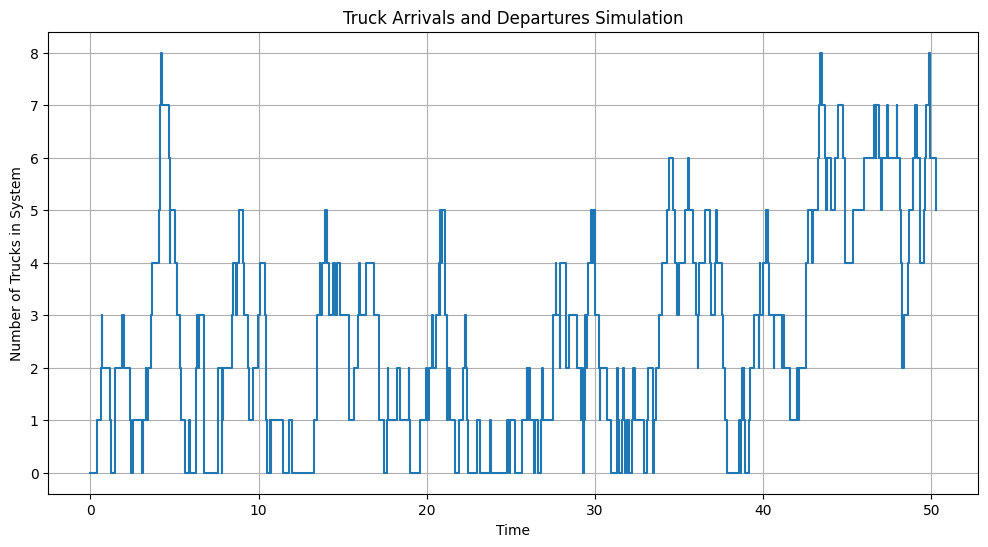

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Simulation:
    def __init__(self):
        self.num_in_system = 0  # initialising number of customers in system
        self.clock = 0.0        #current simulation time
        self.t_arrival = self.generate_interarrival() #time of next arrival
        self.t_departure = float('inf')               #time of next departure

        # statistical counters
        self.num_departures = 0       #total number of departures
        self.num_arrivals = 0         #total number of arrivals
        self.total_waiting_time = 0.0 #cumulative waiting time

        # tracking for visualization
        self.times = [0.0]
        self.system_state = [0]

    def advance_time(self):
        self.total_waiting_time += self.num_in_system * (min(self.t_arrival, self.t_departure) - self.clock)
        t_event = min(self.t_arrival, self.t_departure)
        self.clock = t_event

        if self.t_arrival <= self.t_departure:
            self.handle_truck_arrival()
        else:
            self.handle_truck_departure()

        # Record the state after each event
        self.times.append(self.clock)
        self.system_state.append(self.num_in_system)

    def handle_truck_arrival(self): #starts service immediately server is idle
        self.num_in_system += 1
        self.num_arrivals += 1
        if self.num_in_system == 1:
            self.t_departure = self.clock + self.generate_service_time()
        self.t_arrival = self.clock + self.generate_interarrival()

    def handle_truck_departure(self):
        self.num_in_system -= 1
        self.num_departures += 1
        if self.num_in_system > 0:
            self.t_departure = self.clock + self.generate_service_time()
        else:
            self.t_departure = float('inf')

    def generate_interarrival(self):
        return np.random.exponential(1/3)#an average arrival rate is 3 per units of time

    def generate_service_time(self):
        return np.random.exponential(1/4)#an average service rate is 4 per units of time

    def run_simulation(self, max_time):
        while self.clock < max_time:
            self.advance_time()

    def plot_results(self):
        plt.figure(figsize=(12, 6))
        plt.step(self.times, self.system_state, where='post', label='Number of Trucks')
        plt.xlabel('Time')
        plt.ylabel('Number of Trucks in System')
        plt.title('Truck Arrivals and Departures Simulation')
        plt.grid(True)


        # Print summary statistics
        print(f"Total arrivals: {self.num_arrivals}")
        print(f"Total departures: {self.num_departures}")
        print(f"Average waiting time: {self.total_waiting_time / self.num_departures:.2f}")
        print(f"Average number in system: {np.mean(self.system_state):.2f}")

# Run the simulation
np.random.seed()#ensures randomness
sim = Simulation()#simulation is not continous since event simulation is discrete. events happen only at truck arrivals and departure
sim.run_simulation(max_time=50)  # Run for 50 time units
sim.plot_results()